# Soble Edge Detection

1. Define two 3*3 kernels to detect horizontal and vertical edges
    Gx = [[1 0 -1], [2 0 -2] , [1 0 -1]]
    Gy = [[-1 -2 -1], [0 0 0], [1 2 1]]
2. Load input image
3. Convert to gray scale
4. Convolution of image with soble kernels
5. Compute gradient magnitude at each pixel
6. Normalize and display edges

   

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ------------------ Step 1: Define Sobel Kernels ------------------
# Create kernels as numpy arrays with explicit dtype
Gx = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
], dtype=np.float32)

Gy = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)


# ------------------ Step 2: Load input image ------------------
img = cv2.imread('butterfly_image.jpg')   

# ------------------ Step 3: Convert to grayscale ------------------
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Gray image shape: (1920, 1920) dtype: uint8


In [12]:
# ------------------ Step 4: Convolution with Sobel Kernels ------------------
Ix = cv2.filter2D(gray, cv2.CV_32F, Gx)   # Horizontal edges
Iy = cv2.filter2D(gray, cv2.CV_32F, Gy)   # Vertical edges

# ------------------ Step 5: Gradient magnitude ------------------
G = np.sqrt(Ix**2 + Iy**2)

# ------------------ Step 6: Normalize ------------------
G = (G / G.max()) * 255

G = G.astype(np.uint8)

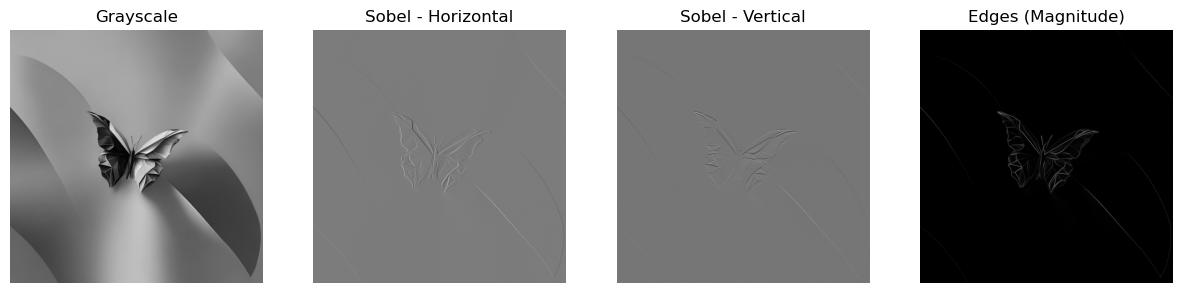

In [13]:
# ------------------ Display results ------------------

plt.figure(figsize=(15,6))

plt.subplot(1,4,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(Ix, cmap='gray')
plt.title("Sobel - Horizontal")
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(Iy, cmap='gray')
plt.title("Sobel - Vertical")
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(G, cmap='gray')
plt.title("Edges (Magnitude)")
plt.axis('off')

plt.show()


(np.float64(-0.5), np.float64(1919.5), np.float64(1919.5), np.float64(-0.5))

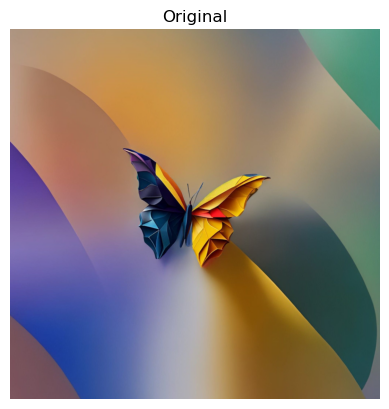

In [14]:
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Canny Edge Detection

1. Noise reduction using Gaussion filters (smoothing using gaussian)
2. find gradient using soble filters
    Find gradient magnitude and direction.
3. NOn maximal suppression( thinning edges)
4. Double Thresholding
5. Edge tracking by hysteresis

In [15]:
import cv2, numpy as np, matplotlib.pyplot as plt

# 1. Load and smooth
img = cv2.imread("henri.jpg", cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(img, (5,5), 1.4)

# 2. Sobel gradients
Gx, Gy = cv2.Sobel(blur, cv2.CV_64F, 1,0,3), cv2.Sobel(blur, cv2.CV_64F, 0,1,3)
mag, ang = np.hypot(Gx,Gy), np.rad2deg(np.arctan2(Gy,Gx)) % 180

# 3. Non-maximum suppression
nms = np.zeros_like(mag)
dirs = [(0,(0,1),(0,-1)), (45,(1,-1),(-1,1)), (90,(1,0),(-1,0)), (135,(-1,-1),(1,1))]
for angle, p1, p2 in dirs:
    mask = ((ang >= angle-22.5) & (ang < angle+22.5))
    q, r = np.roll(mag, p1, (0,1)), np.roll(mag, p2, (0,1))
    nms[(mag >= q) & (mag >= r) & mask] = mag[(mag >= q) & (mag >= r) & mask]

# 4. Double threshold
high, low = nms.max()*0.2, nms.max()*0.1
strong, weak = 255, 50
res = np.where(nms >= high, strong, np.where(nms >= low, weak, 0)).astype(np.uint8)

# 5. Hysteresis
M,N = res.shape
for i in range(1,M-1):
    for j in range(1,N-1):
        if res[i,j]==weak and np.any(res[i-1:i+2,j-1:j+2]==strong):
            res[i,j]=strong
        elif res[i,j]==weak: res[i,j]=0

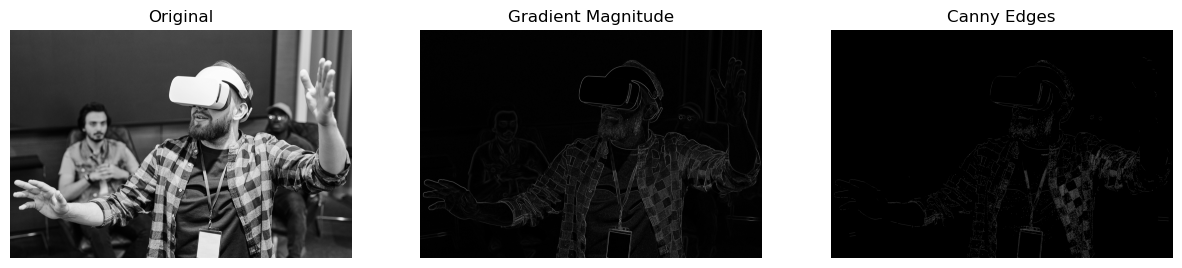

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(mag, cmap='gray'); plt.title("Gradient Magnitude"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(res, cmap='gray'); plt.title("Canny Edges"); plt.axis('off')
plt.show()